In [ ]:
from google.colab import drive


In [5]:
!ls "/content/drive/My Drive"

'amazon dataset'   Classroom  'Colab Notebooks'


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv("drive/My Drive/amazon dataset/final_data.csv")

In [8]:

data.shape

(364171, 11)

In [ ]:
data.dropna(inplace= True)

Sampling data : Will consider only 2000 points due to RAM constraints

In [ ]:
data_posi = data[data['Score'] == 'positive']

In [ ]:
data_negi = data[data['Score'] == 'negative']

In [ ]:
reduced_df_posi = data_posi.sample(1000)
reduced_df_negi = data_negi.sample(1000)

In [ ]:
reduced_data = pd.concat([reduced_df_posi, reduced_df_negi],axis=0,ignore_index=True)

In [ ]:
reduced_data = reduced_data.sample(frac=1).reset_index(drop=True)

In [55]:
reduced_data['Score'].value_counts()

positive    1000
negative    1000
Name: Score, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Bag Of Words implementation

In [57]:
reduced_data.shape

(2000, 11)

In [ ]:
count_vect = CountVectorizer()

In [ ]:
final_counts = count_vect.fit_transform(reduced_data['CleanedText'].values)

In [60]:
final_counts.shape

(2000, 6644)

In [ ]:
count_vect = CountVectorizer(ngram_range=(1,2))

In [62]:
final_bigram_counts = count_vect.fit_transform(reduced_data['CleanedText'].values)
final_bigram_counts.shape

(2000, 67795)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
model = TSNE(n_components=2, random_state=0)

In [ ]:
tsne_data = model.fit_transform(final_bigram_counts.todense())

In [70]:
tsne_data[0]

array([-58.710537,  -9.228324], dtype=float32)

In [ ]:
tsne_data = np.vstack((tsne_data.T, reduced_data['Score'])).T

In [74]:
tsne_data

array([[-58.71053695678711, -9.228323936462402, 'negative'],
       [7.977662086486816, 45.278751373291016, 'positive'],
       [-39.30560302734375, -5.451309680938721, 'negative'],
       ...,
       [-36.61128616333008, -68.95693969726562, 'negative'],
       [12.755775451660156, 22.148141860961914, 'positive'],
       [54.34970474243164, -51.4055290222168, 'negative']], dtype=object)

In [ ]:
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

In [76]:
tsne_df.head()

,Dim_1,Dim_2,label
0,-58.7105,-9.22832,negative
1,7.97766,45.2788,positive
2,-39.3056,-5.45131,negative
3,-39.1571,0.942525,negative
4,28.1192,44.688,positive


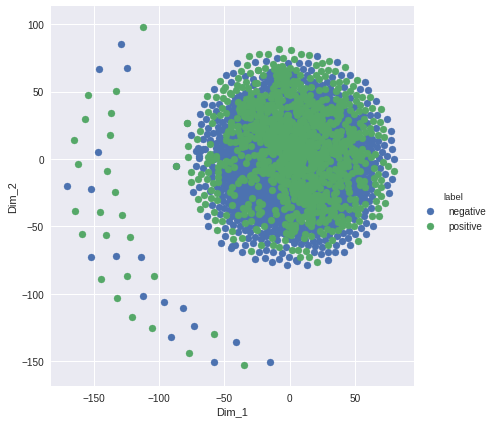

In [80]:
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [1]:
# T-sne for perplexity : 50

In [9]:
reduced_df_posi = data_posi.sample(1000)
reduced_df_negi = data_negi.sample(1000)
reduced_data = pd.concat([reduced_df_posi, reduced_df_negi],axis=0,ignore_index=True)
reduced_data = reduced_data.sample(frac=1).reset_index(drop=True)
print(reduced_data['Score'].value_counts())
count_vect = CountVectorizer(ngram_range=(1,2))
final_bigram_counts = count_vect.fit_transform(reduced_data['CleanedText'].values)
print(final_bigram_counts.shape)
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(final_bigram_counts.toarray())
tsne_data = np.vstack((tsne_data.T, reduced_data['Score'])).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

negative    1000
positive    1000
Name: Score, dtype: int64
(2000, 63477)


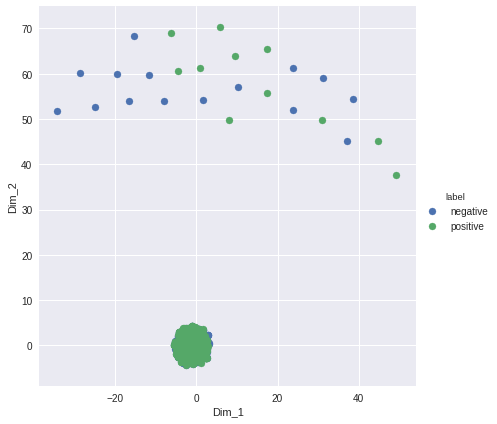

In [10]:
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# Considering 4000 points and using TruncatedSVD for Bag of words representation

In [11]:
data_posi = data[data['Score'] == 'positive']
data_negi = data[data['Score'] == 'negative']
reduced_df_posi = data_posi.sample(2000)
reduced_df_negi = data_negi.sample(2000)
reduced_data = pd.concat([reduced_df_posi, reduced_df_negi],axis=0,ignore_index=True)
reduced_data = reduced_data.sample(frac=1).reset_index(drop=True)
reduced_data['Score'].value_counts()

negative    2000
positive    2000
Name: Score, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(ngram_range=(1,2))
final_bigram_counts = count_vect.fit_transform(reduced_data['CleanedText'].values)
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, random_state=0)
svd_bigrams = svd.fit_transform(final_bigram_counts)

In [ ]:
from sklearn.manifold import TSNE
tsne_model = TSNE(perplexity=50, random_state=1)
tsne_data = tsne_model.fit_transform(svd_bigrams)
tsne_data = np.vstack((tsne_data.T, reduced_data['Score'])).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))


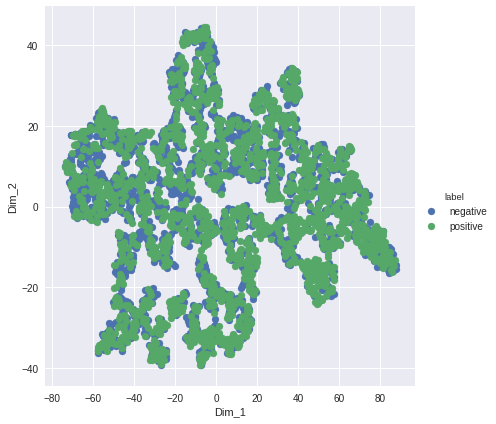

In [14]:
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# tf-idf for 2000 points

In [23]:
data_posi = data[data['Score'] == 'positive']
data_negi = data[data['Score'] == 'negative']
reduced_df_posi = data_posi.sample(1000)
reduced_df_negi = data_negi.sample(1000)
reduced_data = pd.concat([reduced_df_posi, reduced_df_negi],axis=0,ignore_index=True)
reduced_data = reduced_data.sample(frac=1).reset_index(drop=True)
reduced_data['Score'].value_counts()

negative    1000
positive    1000
Name: Score, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(reduced_data['CleanedText'].values)

In [19]:
final_tf_idf.shape

(2000, 65463)

In [24]:
# source: https://buhrmann.github.io/tfidf-analysis.html
def top_tfidf_feats(row, features, top_n=15):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

top_tfidf = top_tfidf_feats(final_tf_idf[1,:].toarray()[0],tf_idf_vect.get_feature_names())
top_tfidf

,feature,tfidf
0,walnut,0.379678
1,trader joe,0.267055
2,trader,0.267055
3,joe,0.263560
4,joe walnut,0.230191
5,much differ,0.218389
6,much,0.132931
7,walnut normal,0.115095
8,skin twice,0.115095
9,regular walnut,0.115095


In [ ]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data = model.fit_transform(final_tf_idf.toarray())
tsne_data = np.vstack((tsne_data.T, reduced_data['Score'])).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

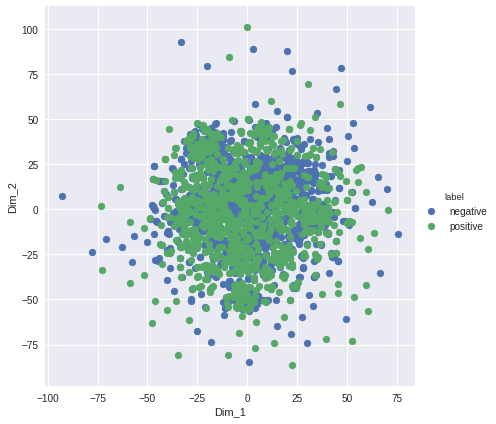

In [26]:
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [3]:
# tf-idf : perplexity = 50

In [ ]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity=50 )
tsne_data = model.fit_transform(final_tf_idf.toarray())
tsne_data = np.vstack((tsne_data.T, reduced_data['Score'])).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

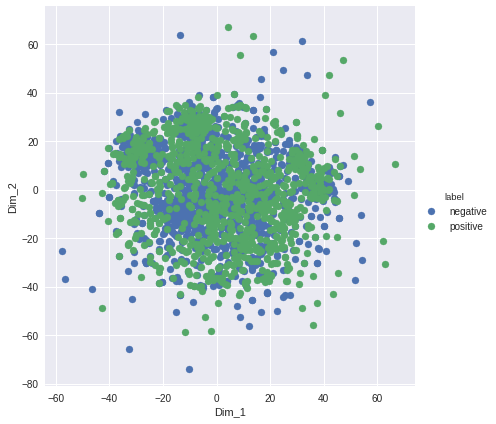

In [28]:
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [4]:
# tf-idf for 8000 points using TruncatedSVD before t-sne

In [29]:
data_posi = data[data['Score'] == 'positive']
data_negi = data[data['Score'] == 'negative']
reduced_df_posi = data_posi.sample(4000)
reduced_df_negi = data_negi.sample(4000)
reduced_data = pd.concat([reduced_df_posi, reduced_df_negi],axis=0,ignore_index=True)
reduced_data = reduced_data.sample(frac=1).reset_index(drop=True)
reduced_data['Score'].value_counts()

negative    4000
positive    4000
Name: Score, dtype: int64

In [ ]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(reduced_data['CleanedText'].values)
svd = TruncatedSVD(n_components=2, random_state=0)
svd_tf_idf = svd.fit_transform(final_tf_idf)

In [ ]:
from sklearn.manifold import TSNE
tsne_model = TSNE(perplexity=50, random_state=1)
tsne_data = tsne_model.fit_transform(svd_tf_idf)
tsne_data = np.vstack((tsne_data.T, reduced_data['Score'])).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

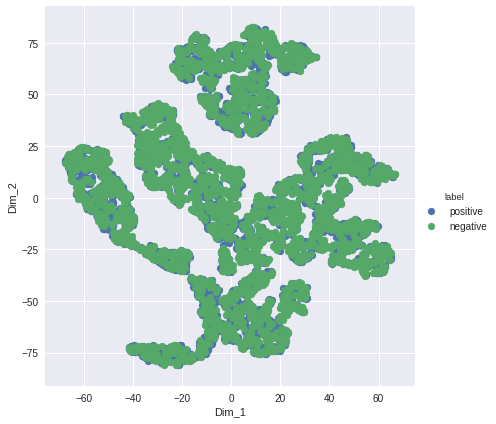

In [32]:
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# Average Word2Vec for 2000 points

In [10]:
data_posi = data[data['Score'] == 'positive']
data_negi = data[data['Score'] == 'negative']
reduced_df_posi = data_posi.sample(1000)
reduced_df_negi = data_negi.sample(1000)
reduced_data = pd.concat([reduced_df_posi, reduced_df_negi],axis=0,ignore_index=True)
reduced_data = reduced_data.sample(frac=1).reset_index(drop=True)
reduced_data['Score'].value_counts()

negative    1000
positive    1000
Name: Score, dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
list_of_sent = []
for sentence in data['CleanedText']:
  try:
    list_of_sent.append(sentence.split())
  except:
    print(sentence)

In [43]:
len(list_of_sent)

364156

In [ ]:
from gensim.models import Word2Vec

In [ ]:
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)

In [ ]:
w2v_words = list(w2v_model.wv.vocab)

In [16]:
len(w2v_words)

21842

In [17]:
w2v_model.wv.most_similar('tasti')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('delici', 0.8091675043106079),
 ('yummi', 0.7771366834640503),
 ('tastey', 0.7677873969078064),
 ('good', 0.6887421011924744),
 ('satisfi', 0.68536376953125),
 ('nice', 0.6758890748023987),
 ('nutriti', 0.66678786277771),
 ('hearti', 0.6434058547019958),
 ('great', 0.6190038323402405),
 ('terrif', 0.6165751814842224)]

In [18]:
w2v_model.wv.most_similar('tasteless')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('flavorless', 0.9435378909111023),
 ('ined', 0.7874577045440674),
 ('bland', 0.7771013975143433),
 ('meali', 0.7551440000534058),
 ('chalki', 0.7432113289833069),
 ('unpalat', 0.7423113584518433),
 ('powderi', 0.7309504151344299),
 ('rubberi', 0.7179739475250244),
 ('unappet', 0.7173506021499634),
 ('unapp', 0.696133017539978)]

In [19]:
w2v_model.wv['bland']

array([-1.5177906 , -2.6421885 , -3.105861  ,  0.40704438,  1.3064836 ,
       -0.8059133 ,  0.4737291 , -3.1867185 , -2.294784  , -2.095498  ,
       -1.3425978 , -0.36641774, -4.184     , -0.8086908 , -0.57752115,
        0.04057616,  1.0476079 ,  0.5404784 ,  0.07137211, -0.15426327,
       -0.67935157,  1.6354661 ,  2.3991685 ,  2.3814867 , -0.56894183,
       -0.08268408,  1.2236478 , -3.8924716 ,  0.29466388,  1.7339771 ,
       -1.0078763 ,  0.45697543,  1.0885521 ,  0.33654326,  3.5793865 ,
        0.17399706,  1.1884243 ,  0.9315237 , -0.24644488, -1.4126133 ,
       -1.4033248 ,  0.8598451 , -1.0190185 ,  2.252293  ,  0.6894006 ,
       -1.3381754 , -1.4976873 , -0.7283647 , -2.8095865 ,  3.6893249 ],
      dtype=float32)

In [ ]:
reduced_sent_list = []
for sent in reduced_data['CleanedText']:
  reduced_sent_list.append(sent.split())

In [69]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in reduced_sent_list: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

2000
50


In [71]:
sent_vectors[0]

array([ 0.52721679,  0.67298028,  0.51618426,  0.70757438,  0.03462338,
       -2.11118504, -1.78890412, -0.20255243, -0.4314912 ,  0.41075367,
       -1.27166914,  0.78964926, -0.1628788 ,  1.71952108,  1.27867079,
        0.50301599,  0.16425302, -0.09413289, -1.40224759, -0.18238555,
        0.07542301, -0.15179009, -1.4612662 , -0.64086295,  0.21255956,
        0.15459433,  0.89899295, -1.90853772,  0.14319027,  0.72034375,
        0.46425591,  1.13792342,  0.5479001 ,  1.359386  , -1.26132222,
        0.23589293,  1.7406733 ,  0.10313637,  1.56889015,  0.37232646,
        0.20714744,  0.81750385,  1.85312652,  0.13778431, -1.38532976,
        0.68294625,  0.3241501 , -0.0473681 , -0.65114106, -0.9030617 ])

In [ ]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity=50 )
tsne_data = model.fit_transform(sent_vectors)
tsne_data = np.vstack((tsne_data.T, reduced_data['Score'])).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

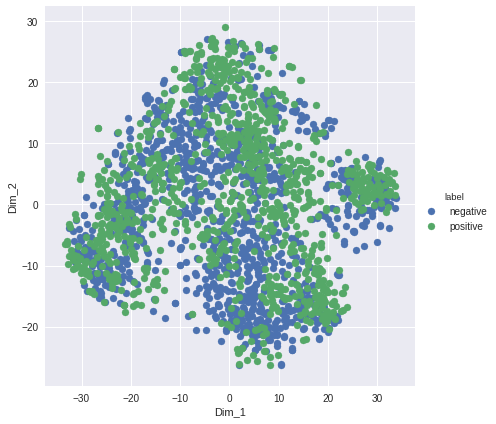

In [73]:
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [21]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

2000
50


In [ ]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity=50 )
tsne_data = model.fit_transform(sent_vectors)
tsne_data = np.vstack((tsne_data.T, data['Score'])).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

In [6]:
# tf-idf weighted Word2Vec using 2000 data points

In [ ]:
# TF-IDF weighted Word2Vec
tfidf_feat = tf_idf_vect.get_feature_names() 
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in reduced_sent_list: # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            
            tf_idf = final_tf_idf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

In [ ]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity=50 )
tsne_data = model.fit_transform(tfidf_sent_vectors)
tsne_data = np.vstack((tsne_data.T, reduced_data['Score'])).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

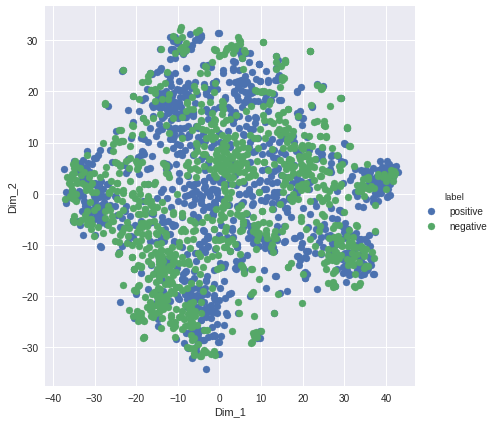

In [31]:
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# Observations

- All the plots showed high overlaping between positive and negative points.
- TruncatedSVD plots allowed more data points to be considered but at the cost of relatively poor plot quality
- BOW representation showed two clusters : one being heavily populated by positive and negative points and the second was fairly spaced out with almost equal population among both the classes
- Although, none of the plots showed signs of a simple plane seperation but, word2vec plots showed the best results among BOW, tf-idf and word2vec techniques